In [1]:
# Import libaries

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# import data

sms = pd.read_csv("SMSSpamCollection.csv", sep = '\t', names = ['label', 'message'])
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
sms_text = sms['message']

In [4]:
sms_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [5]:
import TextCleaner

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
tc = TextCleaner.TextCleaner(text = sms_text, text_form = 'List', stemming = True, lemmat = False)
text_clean = tc.clean()

In [7]:
text_clean[:3]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may tet fa receiv entri questionstd tt ratetc appli over']

In [8]:
sms_text[:3]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: message, dtype: object

In [9]:
# once all the text is cleaned, we now have to create the vocabulary of the sms messages.

In [10]:
pre_vocab_text = ' '.join(text_clean)

In [11]:
pre_vocab_words = sorted(pre_vocab_text.split())

In [12]:
vocab = set(pre_vocab_words)

In [13]:
vocab.add('<UNK>')
vocab.add('<PAD>')

In [14]:
vocab

{'sentenc',
 'stdttrate',
 'delu',
 'fede',
 'nuclear',
 'costa',
 'boyfriend',
 'sudden',
 'spark',
 'uv',
 'weeddefici',
 'foreign',
 'wrk!',
 'roll',
 'ill!',
 'fine!',
 'make',
 'around!',
 'what‘',
 'youv',
 'spontan',
 'readyal',
 'black',
 'uup',
 'main',
 'rentl',
 'cd',
 'chat',
 'kavalan',
 'cover',
 'over',
 'chase',
 'night!',
 'medicin',
 'thia',
 'barm',
 'gaug',
 'tuition',
 'merri',
 'tech',
 'variou',
 'beforew',
 'mg',
 'thatd',
 'tp',
 'closedinclud',
 'oper',
 'dontgettet',
 'faber',
 'delet',
 'hun!',
 'orang',
 'blake',
 'clearer',
 'corpor',
 'comp',
 'british',
 'etc',
 'itcould',
 'd!!b',
 'lit',
 'hellodrivbyquit',
 'heater',
 'danalla',
 'hurt',
 'wwwbridalpetticoatdreamscouk',
 'reappli',
 'upset',
 'questionstd',
 'custcar',
 'blond',
 'bcozi',
 'doin',
 'tmorrowpl',
 'disast',
 'fmyou',
 'stone',
 'what',
 'foreg',
 'soire',
 'stori',
 'adewal',
 'chop',
 'onlin',
 'cha',
 'muhommad',
 'reltnship!!',
 'stopc',
 'hide',
 'hardest',
 'waysmscom',
 'thasa',
 

In [15]:
remv = sorted(list(vocab))

In [16]:
remv.remove('!')
remv.remove('!!')
remv.remove('!!!')
remv.remove('!!!!')
remv.remove('!thi')

In [17]:
remv

['<PAD>',
 '<UNK>',
 'aa',
 'aah',
 'aah!',
 'aaniy',
 'aaooooright',
 'aathilov',
 'aathiwher',
 'ab',
 'abbey!',
 'abdomen',
 'abeg',
 'abelu',
 'aberdeen',
 'abi',
 'abi!',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'about!',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'access!',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'accordinglyor',
 'account',
 'accumul',
 'ach',
 'achanammarakheshqatar',
 'achiev',
 'acid!',
 'acknowledg',
 'aclpm',
 'acnt',
 'acoentri',
 'across',
 'acsmsreward',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'acwicmbcktzr!',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'addressul',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'admiti',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',

In [18]:
word_to_ix = {word:i for i, word in enumerate(remv)}
word_to_ix

{'<PAD>': 0,
 '<UNK>': 1,
 'aa': 2,
 'aah': 3,
 'aah!': 4,
 'aaniy': 5,
 'aaooooright': 6,
 'aathilov': 7,
 'aathiwher': 8,
 'ab': 9,
 'abbey!': 10,
 'abdomen': 11,
 'abeg': 12,
 'abelu': 13,
 'aberdeen': 14,
 'abi': 15,
 'abi!': 16,
 'abil': 17,
 'abiola': 18,
 'abj': 19,
 'abl': 20,
 'abnorm': 21,
 'about!': 22,
 'abouta': 23,
 'abroad': 24,
 'absenc': 25,
 'absolut': 26,
 'abstract': 27,
 'abt': 28,
 'abta': 29,
 'aburo': 30,
 'abus': 31,
 'ac': 32,
 'academ': 33,
 'acc': 34,
 'accent': 35,
 'accentur': 36,
 'accept': 37,
 'access': 38,
 'access!': 39,
 'accid': 40,
 'accident': 41,
 'accommod': 42,
 'accommodationvouch': 43,
 'accomod': 44,
 'accordin': 45,
 'accordingli': 46,
 'accordinglyor': 47,
 'account': 48,
 'accumul': 49,
 'ach': 50,
 'achanammarakheshqatar': 51,
 'achiev': 52,
 'acid!': 53,
 'acknowledg': 54,
 'aclpm': 55,
 'acnt': 56,
 'acoentri': 57,
 'across': 58,
 'acsmsreward': 59,
 'act': 60,
 'actin': 61,
 'action': 62,
 'activ': 63,
 'actor': 64,
 'actual': 65,
 'a

In [19]:
ix_to_word = {i:word for i, word in enumerate(remv)}
ix_to_word

{0: '<PAD>',
 1: '<UNK>',
 2: 'aa',
 3: 'aah',
 4: 'aah!',
 5: 'aaniy',
 6: 'aaooooright',
 7: 'aathilov',
 8: 'aathiwher',
 9: 'ab',
 10: 'abbey!',
 11: 'abdomen',
 12: 'abeg',
 13: 'abelu',
 14: 'aberdeen',
 15: 'abi',
 16: 'abi!',
 17: 'abil',
 18: 'abiola',
 19: 'abj',
 20: 'abl',
 21: 'abnorm',
 22: 'about!',
 23: 'abouta',
 24: 'abroad',
 25: 'absenc',
 26: 'absolut',
 27: 'abstract',
 28: 'abt',
 29: 'abta',
 30: 'aburo',
 31: 'abus',
 32: 'ac',
 33: 'academ',
 34: 'acc',
 35: 'accent',
 36: 'accentur',
 37: 'accept',
 38: 'access',
 39: 'access!',
 40: 'accid',
 41: 'accident',
 42: 'accommod',
 43: 'accommodationvouch',
 44: 'accomod',
 45: 'accordin',
 46: 'accordingli',
 47: 'accordinglyor',
 48: 'account',
 49: 'accumul',
 50: 'ach',
 51: 'achanammarakheshqatar',
 52: 'achiev',
 53: 'acid!',
 54: 'acknowledg',
 55: 'aclpm',
 56: 'acnt',
 57: 'acoentri',
 58: 'across',
 59: 'acsmsreward',
 60: 'act',
 61: 'actin',
 62: 'action',
 63: 'activ',
 64: 'actor',
 65: 'actual',
 66

In [20]:
# now convert the words to index

In [21]:
sent_to_ix = []
for i in text_clean:
    each_ix = []
    for w in i.split():
        if w not in word_to_ix:
            each_ix.append(word_to_ix['<UNK>'])
        else:
            each_ix.append(word_to_ix[w])
    sent_to_ix.append(each_ix)

In [22]:
each_ix

[5418, 6709, 4223]

In [23]:
print(sent_to_ix[3])
print([ix_to_word[i] for i in sent_to_ix[3]])

[6771, 1821, 5540, 1842, 2913, 6771, 886, 195, 5540]
['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say']


In [24]:
text_clean[3]

'u dun say earli hor u c alreadi say'

In [25]:
len(sent_to_ix)

5572

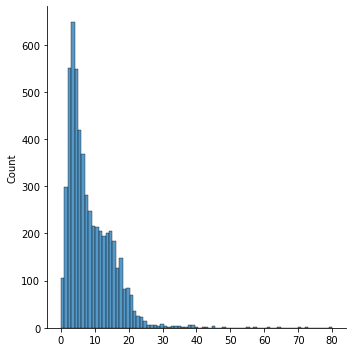

In [26]:
#distribution of length of SMS
# most of the sms length lies in 10, so we consider max length=10
length = []
for s in sent_to_ix:
    length.append(len(s))
import seaborn as sns
sns.displot(length)

In [27]:
padded_sentence = []
max_length=10
for s in sent_to_ix:
    if (len(s)<max_length):
        pad_req = max_length-len(s)
        pad_zero = [0]*pad_req
        padded_sentence.append(s+pad_zero)
    elif (len(s)>=10):
        padded_sentence.append(s[:max_length])

In [28]:
s[:2]

[5418, 6709]

In [29]:
len(padded_sentence)

5572

In [30]:
padded_sentence

[[2509, 3345, 4913, 1370, 427, 845, 4210, 2605, 7297, 3487],
 [4507, 3522, 3307, 7196, 6771, 4541, 0, 0, 0, 0],
 [2312, 1968, 7252, 1241, 7211, 2075, 1422, 2186, 6562, 6052],
 [6771, 1821, 5540, 1842, 2913, 6771, 886, 195, 5540, 0],
 [4216, 1735, 6484, 2523, 6898, 3652, 341, 6504, 0, 0],
 [2321, 2813, 1477, 7107, 7285, 473, 3018, 3620, 2379, 6106],
 [2038, 812, 3620, 5979, 6690, 3620, 143, 4723, 0, 0],
 [4762, 5339, 3936, 3936, 4601, 4009, 4441, 6952, 5642, 907],
 [7221, 6926, 4285, 1432, 5605, 5264, 5055, 5377, 1146, 900],
 [4063, 4101, 6771, 5182, 1966, 6860, 3537, 1217, 4063, 934],
 [3045, 2539, 2884, 5935, 1735, 7051, 6322, 6170, 271, 6624],
 [5754, 1035, 7211, 991, 4966, 6725, 1402, 5616, 1332, 4743],
 [6878, 7107, 2312, 3941, 5055, 3239, 6725, 7285, 1146, 6348],
 [3221, 5581, 5388, 7285, 6425, 784, 5089, 7275, 6314, 2790],
 [1486, 6218, 7209, 0, 0, 0, 0, 0, 0, 0],
 [4065, 6895, 1378, 1162, 7053, 3636, 4280, 6725, 3964, 1162],
 [4499, 3416, 7068, 0, 0, 0, 0, 0, 0, 0],
 [1898, 6771

In [31]:
y = np.where(sms['label']=='ham', 1, 0)

In [32]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [33]:
# data split in batch

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset

xarray = np.array(padded_sentence)
yarray = np.array(y)

ix_train = int(xarray.shape[0]*0.7)
ix_valid = int(xarray.shape[0]*0.85)

X_train = torch.tensor(xarray[:ix_train], dtype = torch.long)
Y_train = torch.tensor(yarray[:ix_train], dtype = torch.long)

X_valid = torch.tensor(xarray[ix_train:ix_valid], dtype = torch.long)
Y_valid = torch.tensor(yarray[ix_train:ix_valid], dtype = torch.long)

X_test = torch.tensor(xarray[ix_valid:], dtype = torch.long)
Y_test = torch.tensor(yarray[ix_valid:], dtype = torch.long)

Batch=60
train = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train, batch_size = Batch, shuffle = True, drop_last=True)

valid = TensorDataset(X_valid, Y_valid)
valid_loader = DataLoader(valid, batch_size = Batch, shuffle = False, drop_last=True)

test = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test, batch_size = Batch, shuffle = False, drop_last=True)

In [38]:
#model class

class GRUSpam(nn.Module):
    
    def __init__(self, num_embedding, emed_dim, batch, seq_len, inp_sz, rnn_hid_sz, nlayer, fc_in1,fc_out2):
        super(GRUSpam, self).__init__()
        
        self.num_embedding = num_embedding
        self.emed_dim = emed_dim
        self.batch = batch
        self.seq_len = seq_len
        self.inp_sz = inp_sz
        self.rnn_hid_sz = rnn_hid_sz
        self.nlayer = nlayer
        self.fc_in1 = fc_in1
        self.fc_out = fc_out2
        self.embed = nn.Embedding(self.num_embedding, self.emed_dim)
        self.rnn = nn.GRU(self.inp_sz,self.rnn_hid_sz,self.nlayer)
        self.fc1 = nn.Linear(self.fc_in1, self.fc_out)
        self.softmax = nn.Softmax(dim=1)
        self.drop = nn.Dropout(0.1)
        
    def forward(self, x):
        x = self.embed(x)
        x = x.view(self.seq_len, self.batch, self.inp_sz)
        hidden = torch.randn(self.nlayer, self.batch, self.rnn_hid_sz)
        x, hidden = self.rnn(x, hidden)
        x = x.view(self.batch, self.fc_in1)
        x = F.tanh(self.fc1(x))
        x = self.softmax(x)
        return (x)   

In [39]:
len(vocab)

7549

In [40]:
#model

num_embedding = len(vocab)
embed_dim = 50
batch = Batch
seq_len = xarray.shape[1]
inp_sz = embed_dim
rnn_hid_sz = 100
nlayer = 1
fc_in1 = rnn_hid_sz*seq_len
out_sz = 2
fc_out2 = out_sz

model = GRUSpam(num_embedding, embed_dim, batch, seq_len, inp_sz, rnn_hid_sz, nlayer, fc_in1,fc_out2)

In [41]:
print(model)

GRUSpam(
  (embed): Embedding(7549, 50)
  (rnn): GRU(50, 100)
  (fc1): Linear(in_features=1000, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
  (drop): Dropout(p=0.1, inplace=False)
)


In [42]:
#loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.01)

In [43]:
def TestAccuracy(pred, yt):
    
    pred_ix = pred.argmax(dim = 1)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(yt.numpy(), pred_ix.numpy())
    return (np.round(acc, 3))

In [44]:
def ValidationAnalysis(xtest, ytest):
    valid_actual = []
    valid_predict = []
    avg_valid_loss = []
    with torch.no_grad():
        
        for xv, yv in valid_loader:
            yp = model(xv)
            pred_ix = yp.argmax(dim = 1)
            valid_loss = criterion(yp, yv)
            avg_valid_loss.append(valid_loss)
            valid_predict.append(pred_ix.numpy())
            valid_actual.append(yv.numpy())
                     
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(np.array(valid_actual).reshape(-1,1), np.array(valid_predict).reshape(-1,1)) 
    return (yp, np.array(valid_predict).reshape(-1,1), np.array(valid_actual).reshape(-1,1), np.round(acc, 3), np.round(np.mean(avg_valid_loss),3))

In [45]:
def EachAccuracyClass(yt, pt):
    cls, ncls = np.unique(yt, return_counts = True)
    acc = pd.DataFrame()
    acc['ytest'] = yt.squeeze()
    acc['pred'] = pt.squeeze()
    class_acc = {}
    from sklearn.metrics import accuracy_score
    for c in cls:
        sig = acc.loc[acc.loc[acc['ytest']==c].index]
        class_acc[str(c)] = round(accuracy_score(sig['ytest'], sig['pred'])*100, 2)
    return (class_acc)

## Training

In [46]:
epochs = 50

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p = []
valid_one_class_p = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model(xt)
        loss = criterion(out, yt)
        train_losses.append(loss.detach())
        train_acc= TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = ValidationAnalysis(X_valid, Y_valid)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p.append(each_class_pred['0'])
            valid_one_class_p.append(each_class_pred['1'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")
        
            #############################[[[Model Save]]]#########################################
            if (len(valid_zero_class_p) > 2):
                if (valid_zero_class_p[-2] < valid_zero_class_p[-1]):
                    if (valid_one_class_p[-2] < valid_one_class_p[-1]):
                        FILE = "model_gru.pth"
                        torch.save(model, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
            loss.backward()
            optimizer.step()

Training started...
Epoch: 0 |Train Loss: 0.6809999942779541 | Train Accuracy: 0.65 | Train-Class: [0 1] 


C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0 |Train Loss: 0.48399999737739563 | Train Accuracy: 0.867 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.4830000102519989 | Train Accuracy: 0.867 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.47099998593330383 | Train Accuracy: 0.883 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.49000000953674316 | Train Accuracy: 0.867 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.5040000081062317 | Train Accuracy: 0.817 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.44999998807907104 | Train Accuracy: 0.917 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.49399998784065247 | Train Accuracy: 0.85 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.44600000977516174 | Train Accuracy: 0.917 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.4959999918937683 | Train Accuracy: 0.85 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.4880000054836273 | Train Accuracy: 0.867 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.4950000047683716 | Train Accuracy: 0.85 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.4860000014305115 | Train A

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 1 |Train Loss: 0.44200000166893005 | Train Accuracy: 0.917 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.42500001192092896 | Train Accuracy: 0.933 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.44699999690055847 | Train Accuracy: 0.917 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.46000000834465027 | Train Accuracy: 0.883 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.4480000138282776 | Train Accuracy: 0.917 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.460999995470047 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.4309999942779541 | Train Accuracy: 0.933 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.48100000619888306 | Train Accuracy: 0.867 | Train-Class: [0 1] 
Epoch: 1 |Train Loss: 0.41100001335144043 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 2 |Train Loss: 0.39500001072883606 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.4020000100135803 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.4059999883174896 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.41600000858306885 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.4059999883174896 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.39500001072883606 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3959999978542328 | Tr

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 3 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.39500001072883606 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.39800000190734863 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.42100000381469727 | Train Accuracy: 0.95 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 3 |Train Loss: 0.3959999978542328 | Tra

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 4 |Train Loss: 0.40700000524520874 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.39500001072883606 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.42100000381469727 | Train Accuracy: 0.95 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.39899998903274536 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.4099999964237213 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3869999945163727 | Trai

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 5 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.39899998903274536 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.40299999713897705 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.42100000381469727 | Train Accuracy: 0.95 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 5 |Train Loss: 0.42399999499320984 | Train Accur

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 6 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.39500001072883606 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.39399999380111694 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3959999978542328 | Tra

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 7 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.4059999883174896 | Train Accura

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 8 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.4259999990463257 | Train Accuracy: 0.933 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.39899998903274536 | Train Accuracy

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 9 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.38499999046325684 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 9 |Train Loss: 0.4090000092983246 | Train Accuracy: 0

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.39399999380111694 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 10 |Train Loss: 0.4009999930858612 | Train Accurac

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 11 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3869999945163727 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3959999978542328 | Tr

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 12 |Train Loss: 0.39500001072883606 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.41600000858306885 | Train Accuracy: 0.95 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.40400001406669617 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.39599999785423

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 13 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.382999986410141 | Train 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 14 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.3869999945163727 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.382999986410141 | Tr

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 15 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.4020000100135803 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.42399999499320984 | Train Accuracy: 0.95 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3959999978542328 | Trai

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 16 |Train Loss: 0.3959999978542328 | Train Ac

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.382999986410141 | Train Accura

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.3959999978542328 | Train Accur

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 19 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3959999978542328 | Train

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 20 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.3889999985694885 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.382999986410141 | Tra

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.3880000114440918 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 21 |Train Loss: 0.3959999978542328 | Train Accuracy

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 22 |Train Loss: 0.38600000739097595 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 22 |Train Loss: 0.382999986410141 | Train Accurac

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.382999986410141 | Train Accu

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 24 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.382999986410141 | Train Acc

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3959999978542328 | Train Accuracy: 0

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 26 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.382999986410141 | Train 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 27 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3869999945163727 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3869999945163727 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.4090000092983246 | Train Accu

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 28 |Train Loss: 0.3959999978542328 | Train Accuracy: 0

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 29 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.42100000381469727 | Train Accuracy: 0.95 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 29 |Train Loss: 0.38499999046325684 | Train Ac

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 30 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 30 |Train Loss: 0.3959999978542328 | Train 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 31 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.414000004529953 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.4009999930858612 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 32 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.382999986410141 | Train A

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3919999897480011 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.39800000190734863 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.382999986410141 | Train Acc

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.40400001406669617 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 34 |Train Loss: 0.382999986410141 | Train Accuracy:

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 35 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.382999986410141 | Train Accura

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 36 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3959999978542328 | Train 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3840000033378601 | Train Accur

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3959999978542328 | Train Accura

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 39 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.382999986410141 | 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 40 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.382999986410141 | Train Accura

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 41 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 41 |Train Loss: 0.382999986410141 | Tra

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 42 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 42 |Train Loss: 0.382999986410141 | Train Accur

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.4050000011920929 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.382999986410141 | Train Accu

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 44 |Train Loss: 0.3840000033378601 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.382999986410141 | Tr

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3880000114440918 | Train Acc

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3959999978542328 | Train Acc

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 47 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.3869999945163727 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.382999986410141 | Train Accuracy

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 48 |Train Loss: 0.3880000114440918 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3880000114440918 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.39899998903274536 | Train Accuracy: 0.967 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3869999945163727 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.382999986410141 | Tr

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3959999978542328 | Train Accuracy: 0.983 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.382999986410141 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3959999978542328 | Train Accura

In [47]:
import matplotlib.pyplot as plt

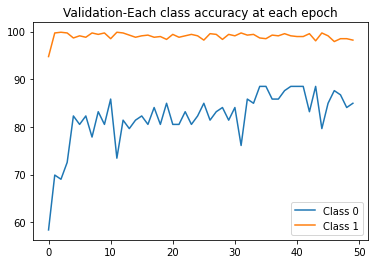

In [48]:
plt.plot(valid_zero_class_p, label = 'Class 0')
plt.plot(valid_one_class_p, label = 'Class 1')
plt.title("Validation-Each class accuracy at each epoch")
plt.legend()
plt.show()

## Testing

In [49]:
def TestAnalysis(model_saved, test_loader):
    test_actual = []
    test_predict = []

    for xtst, ytst in test_loader:
        yp = model_saved(xtst)
        pred_ix = yp.argmax(dim = 1)
        test_predict.append(pred_ix.numpy())
        test_actual.append(ytst.numpy())
        
    return (np.array(test_predict).reshape(-1,1), np.array(test_actual).reshape(-1,1))

In [50]:
# load model

MODEL = torch.load("model_gru.pth")
MODEL.eval()

GRUSpam(
  (embed): Embedding(7549, 50)
  (rnn): GRU(50, 100)
  (fc1): Linear(in_features=1000, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
  (drop): Dropout(p=0.1, inplace=False)
)

In [51]:
#test 
test_pred, test_actual = TestAnalysis(MODEL, test_loader)

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [52]:
#metrics

from sklearn.metrics import accuracy_score
accuracy_score(test_actual, test_pred)

0.9717948717948718

In [53]:
# each class accuracy

EachAccuracyClass(test_actual, test_pred)

{'0': 84.47, '1': 99.11}